# Алгоритмы классификации (продолжение)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from copy import deepcopy
%matplotlib inline
import math

In [33]:
data = list([])
f = open("train.csv")
isFirst = True
for line in f:
    if isFirst == True:
        isFirst = False
        continue
    data.append(list(map(int, line.split(','))))
f.close()
data = np.array(data)
x_data = data[:, 1:]
y_data = data[:, 0]
c = 200
x_data = x_data[: c]
y_data = y_data[: c]

In [19]:
# применить решающий лес
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от числа деревьев (n_estimators). 
# Что означают и как влияют параметры criterion, max_depth, min_samples_split, min_samples_leaf ?

***max_depth*** -- максимальаная глубина дерева.

***min_samples_split*** -- минимальное количество выборок при делении узла.

***min_samples_leaf*** -- минимальное количество выборок на листьях при делении узла.

***criterion*** -- функция для измерения разделения узла.

***n_estimators*** -- количество деревьев.

Переведено с документации.

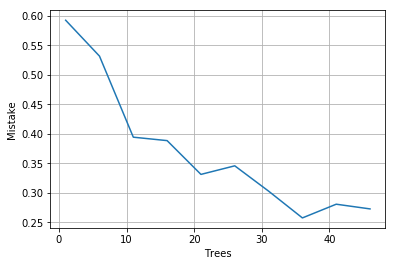

Минимальная ошибка 0.257631803293, при max_depth = 36


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

y = list([])
x = list([])
for i in range(1, 51, 5):
    clf = RandomForestClassifier(n_estimators=i)
    scores = cross_val_score(estimator=clf, X=x_data, y=y_data, cv=10)
    y.append(1 - scores.mean())
    x.append(i)
    

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot(x, y)
plt.ylabel('Mistake')
plt.xlabel('Trees')
plt.grid()
plt.show()

print('Минимальная ошибка ', min(y),', при max_depth = ', x[y.index(min(y))], sep='')

In [21]:
# применить бустинг
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# какие параметры и как влияют на качество классификации?

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier()
cv = cross_val_score(clf, x_data, y_data, cv=10)
print('Ошибка:', 1 - cv.mean())

Ошибка: 0.404194101467


Параметры почти аналогичны с предыдущим методом

Лучший метод -- решающий лес(для выборки в 5000 элементов там самая маленькая ошибка, но для удобства я выборку обрзал)

# Работа с бинарными изображениями
## с помощью библиотеки http://scikit-image.org

In [4]:
# бинаризовать изображения, привести примеры картинок
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html

Слева выведем обычное изображение, справа - бинаризованное.


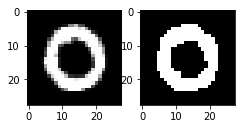

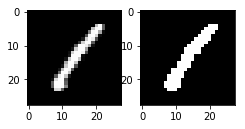

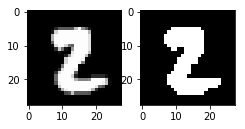

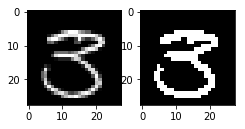

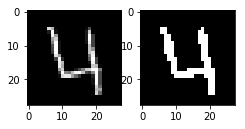

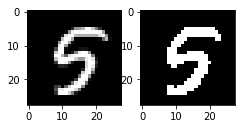

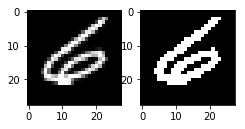

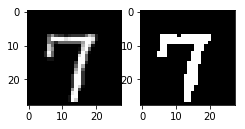

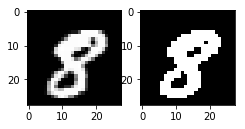

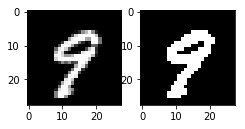

In [48]:
from skimage.filters import threshold_mean
pictures = list([])


for i in range(10):
    digit = x_data[y_data.tolist().index(i)]
    pictures.append(digit)
    pictures.append(digit > threshold_mean(digit))
    
print("Слева выведем обычное изображение, справа - бинаризованное.")
    
for i in range(0, 10):
    plt.figure(figsize=(20, 10))
    for j in range(2):
        plt.subplot(2, 10, j + 1)
        plt.imshow(np.reshape(pictures[2 * i + j], (28, 28)), cmap="gray")
    plt.show()

In [5]:
# выбрать несколько типичных изображений цифр и несколько не типичных (разомнутую 6, не связные из-за шума и т.п.)
# применить к ним замыкание и размыкание в разных вариантах и порядке
# выбрать наилучший вариант визуально, применить его ко всей выборке
# http://scikit-image.org/docs/dev/api/skimage.morphology.html

In [6]:
# построить скелеты изображений
# визуально выбрать лучшие параметры (skeletonize, medial_axis)
# нарисовать примеры результатов

Первый столбик - обычное изображение цифры, второй - скелет, полученный методом skeletonize.
Третий - скелет, полученный методом medial_axis.


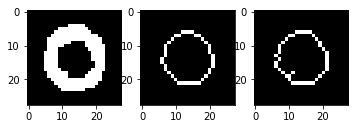

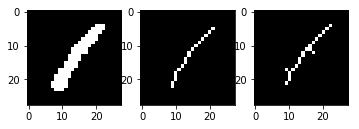

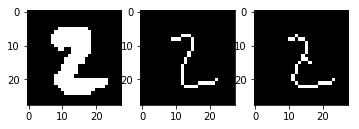

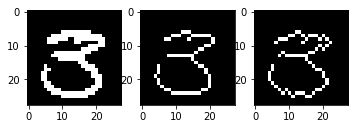

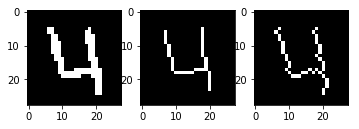

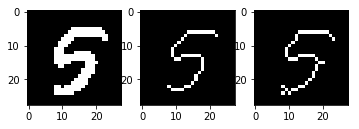

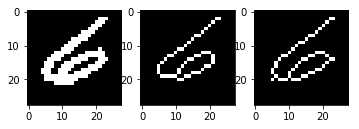

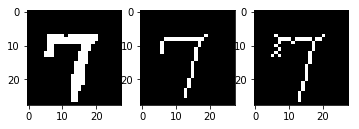

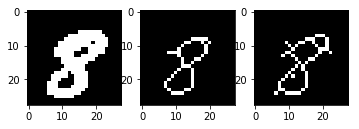

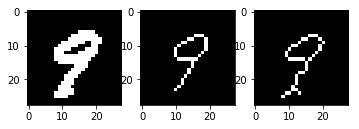

In [51]:
from skimage.morphology import skeletonize
from skimage.morphology import medial_axis

skel_pictures = []

for i in range(10):
    digit = x_data[y_data.tolist().index(i)]
    binared = digit > threshold_mean(digit)
    skel_pictures.append(binared)
    
    skel_pictures.append(skeletonize(np.reshape(binared, (28, 28))))
    skel_pictures.append(medial_axis(np.reshape(binared, (28, 28))))
for i in range(10):
    plt.figure(figsize=(20, 10))
    for j in range(3):
        plt.subplot(2, 10, j + 1)
        plt.imshow(np.reshape(skel_pictures[3 * i + j], (28, 28)), cmap="gray")
    plt.show()

Первый столбик -- это просто картинка цифры
Второй -- скелет через метод skeletonoze
Третий -- скелет через метод medial_axis

In [7]:
# сгенерировать признаки по изображениям и их склетам (площадь, запас связности, ширина и т.д.)

In [8]:
# добавить ваши признаки к признаковому описанию и применить решающие дереья. Сравнить результат с результатом с занятия 2

# Метод главных компонент

In [9]:
# найти среднее изображение

In [89]:
def to_img(vector, demension):
    img = list([])
    j = demension
    while (j <= len(vector)):
        img.append(vector[j - demension: j])
        j += demension
    return img

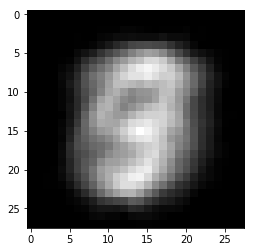

In [90]:
average_img_for_all = sum(x_data) // len(x_data)
plt.imshow(to_img(average_img_for_all, 28), cmap='gray', label='Average image')

In [91]:
# вычислить матрицу выборочной ковариации (сигма). Каково она размера?

Найдем сингулярное разложение матрицы

In [92]:
from scipy.linalg import svd

U, sigma, V_T = svd(to_img(average_img_for_all, 28), full_matrices=False)
print(sigma.shape[0])

28
(28, 28)


По определению сингулярного разложения размерность 28.

In [93]:
# вычислить собственные векторы и собственные числа матрицы сигма. 
# Упорядочить их так, чтобы они располагались в порядке невозрастания собственных чисел,
# а собственные векторы были расположены по столбцу

Матрица сигма в сингулярном разложении -- диагональна(а U и V -- ортоганальны). Собственные значения матрицы есть квадрат матрицы сигма. В сингулярном разложении все уже отсортировано.

In [94]:
print(*sigma**2)

2079182.00627 33233.1379484 13462.2890456 5175.88984939 3033.30079981 1595.70130671 278.525587982 168.673119021 136.773324293 87.476040409 82.7823127545 38.7369639631 29.4796524284 23.2607498502 16.2887438504 8.88474051247 5.70255211667 4.4994438479 4.2854929972 1.24848179725 0.680751639675 0.248740394017 0.0825796739105 0.0390533202571 0.00644747167057 1.73472958739e-26 1.73472958739e-26 1.73472958739e-26


In [12]:
# по графику кумулятивной суммы собственных чисел дать рекомендации по выбору размерности (0.9; 0.95; 0.99)

In [13]:
# нарисовать проекции нескольких цифр на аффинные пространства реккомендованной размерности. 
# Нарисовать проекции на пространства меньшей и большей размерности

In [ ]:
# Применить решающие деревья к выборке меньшей размерности (признаки --- главные координаты)
# Как изменилось качество?